### Core 2

1a: it is because of the minimization of entropy the goal of is to have all leaves completely pure and small changes would make big changes in the tree


1b: it would cause overfitting as we would end up having a tree with too much depth

### Core 3
The split must be done by Y axis because most of the purple data points lie above 0.5 and and most of the yellow data points are below 0.5. Splitting data set by x axis would not make sense because we would lose more data points from each color. 

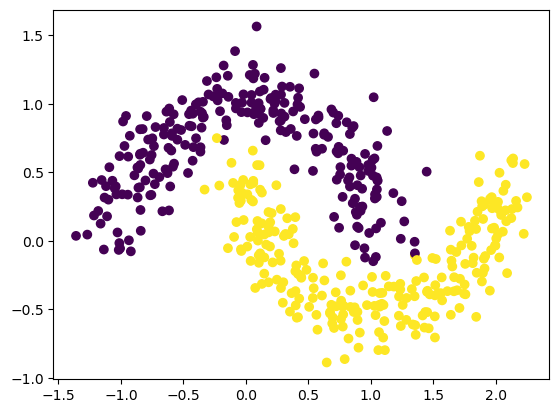

In [1]:
import numpy as np
from sklearn import metrics, inspection, datasets
from matplotlib import pyplot as plt

x_data, y_data = datasets.make_moons(n_samples=500, noise=0.15)

plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

In [22]:
def leaf_gini_impurity(leaf_ys):
    if len(leaf_ys) == 0:
        return 0
    else:
        return 1 - (sum(leaf_ys==0)/len(leaf_ys))**2 - (sum(leaf_ys==1)/len(leaf_ys))**2

def weighted_gini_impurity(left_ys, right_ys):
    total = len(left_ys) + len(right_ys)
    left_leaf = leaf_gini_impurity(left_ys) * len(left_ys)/total
    right_leaf = leaf_gini_impurity(right_ys) * len(right_ys)/total
    return left_leaf + right_leaf 

# You only need to use this function directly to solve this question:
def gini_impurity(x_data, y_data, axis, threshold):
    # The axis argument should be 0 or 1
    # The threshold should be a real valued number
    left_mask = x_data[:, axis] <= threshold
    right_mask = x_data[:, axis] > threshold
    return weighted_gini_impurity(y_data[left_mask], y_data[right_mask]) 

# The function derives the minimum impurity 

gini_impurity(x_data, y_data, axis=0, threshold=0.8)

vals = []
for i in [-1.0, -0.5, 0, 0.5, 1]:
    vals.append([i, gini_impurity(x_data, y_data, axis=0, threshold=i), gini_impurity(x_data, y_data, axis=1, threshold=i)])

threshold2 = 0
ginimin = 0
var = 0

if np.amin(vals, 0)[1:][0] < np.amin(vals, 0)[1:][1]:
    ginimin = np.amin(vals, 0)[1:][0]
    threshold2=np.where(np.array(vals)[:,1] == ginimin)
    var="X"
else:
    ginimin = np.amin(vals, 0)[1:][1]
    threshold2 = np.where(np.array(vals)[:,2] == ginimin)
    var = "Y"
    
threshold2=vals[threshold2[0][0]][0]

print('Y = ', threshold2 , 'Gini Impurity =' , ginimin)

Y =  0.5 Gini Impurity = 0.2844274194958982


The threshold for split is 0.5 on Y axis with minimum impurity of 0.2844274194958982 

### Summary 

Philip's comment on the dataset being impure was quite insightful, as the readings mention the word impurity only in the context of the value prediction. However, as he pointed out, we use a classification tree to classify data as binary information. Then, we use gini impurity to classify data in a binary form better. Abeera's comment about homogeneity pointed out the role of gini impurity value which is the ability to predict an outcome for a given variable. Therefore, we use the value to be more confident in the result based on our data. 

Abdullah raised an interesting perspective in the discussion of trees where you can go out from a common node to reach conditional probability. Therefore, we are conditioning events on each other to move further down the tree. However, Abeera provided a different approach where variables are considered events which is the Bayesian way of thinking about the probability and variables.

### Suggestion

Reading suggestion: 

https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c


- The aforementioned reading explains the main concepts regarding classification 
- It provides data visualizations according to which we are able to identify the smallest gini impurity value 
- Raises issues with overfitting and predicting data 

# PCW for Session 5 


### Core 2

Q1: The Monty Hall problem is a conditional problem because our decision about the next door is conditioned on the person's guess and the door they open 

Q2: Below 

Q3: Below 

Q4: Switch doors

https://docs.google.com/drawings/d/1Z78IXEPSIJe4GfV2YGFg6ESKhQu4zSM-Q80nDfgXWRY/edit?usp=sharing

### Core 3

**Flu in the class**

We have a classroom containing N students all taking the same class during a flu epidemic. We assume that if students don’t meet outside the classroom then their probability of getting the flu is not directly influenced.

Consider the following models:

**A. General**: The general case occurs when we know nothing about which students meet and we decide to model all possible interactions (i.e. assuming that there is no conditional independence between any of the students).

1. The joint probability of P(x_1, x_2, ..., x_n) = P(x_1)P(x_2|x_1)P(x_n|x_1, x_2, ..., x_n)
2. https://docs.google.com/drawings/d/1Q9KulZdEeZ0u39-GOSsEomBmFAr93kgtSy6ZOiz0Lzo/edit?usp=sharing
3. 2^N 


**B. Independence**: A much simpler model assuming full independence between every student. (This is equivalent to none of the students interacting with each other after class.)

1. P(x_1, x_2, ..., x_n) = P(x_1)P(x_2)P(x_n) since all events are independent from each other
2. https://docs.google.com/drawings/d/1Q9KulZdEeZ0u39-GOSsEomBmFAr93kgtSy6ZOiz0Lzo/edit?usp=sharing
3. N


**C. Groups**: A model in which every student belongs to a study group of 5 people. In each group there can be arbitrary interactions that we want to model, but there are no interactions outside of the groups.
1. P(x_1, x_2, ..., x_n) = P(x_1)P(x_2|x_1)P(x_n|x_1, x_2, ..., x_n)
2. https://docs.google.com/drawings/d/1Q9KulZdEeZ0u39-GOSsEomBmFAr93kgtSy6ZOiz0Lzo/edit?usp=sharing
3. N/5 groups are required


For each model, do the following:

1. Write out the factorized joint probability P(X_1, X_2, …, X_N), where X_i is a binary variable that can take the value “Sick” or “Healthy”.
2. Show how this would be represented as a graphical model on a whiteboard (have an image of the model ready to share).
3. Calculate how many parameters would be required to fully specify the model.
